In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
x_train=x_train/255.0

x_test=x_test/255.0

In [6]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=.1,random_state=1,shuffle=True)

In [7]:
print(X_train.shape)
print(X_val.shape)

(54000, 28, 28)
(6000, 28, 28)


In [8]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(X_train,Y_train,epochs=5,validation_data=(X_val,Y_val),batch_size=500,verbose=2)

Epoch 1/5
108/108 - 2s - loss: 0.7947 - accuracy: 0.7782 - val_loss: 0.3302 - val_accuracy: 0.9052 - 2s/epoch - 15ms/step
Epoch 2/5
108/108 - 1s - loss: 0.2776 - accuracy: 0.9211 - val_loss: 0.2501 - val_accuracy: 0.9290 - 573ms/epoch - 5ms/step
Epoch 3/5
108/108 - 1s - loss: 0.2191 - accuracy: 0.9373 - val_loss: 0.2184 - val_accuracy: 0.9387 - 677ms/epoch - 6ms/step
Epoch 4/5
108/108 - 1s - loss: 0.1821 - accuracy: 0.9481 - val_loss: 0.1921 - val_accuracy: 0.9440 - 624ms/epoch - 6ms/step
Epoch 5/5
108/108 - 1s - loss: 0.1577 - accuracy: 0.9547 - val_loss: 0.1734 - val_accuracy: 0.9530 - 602ms/epoch - 6ms/step


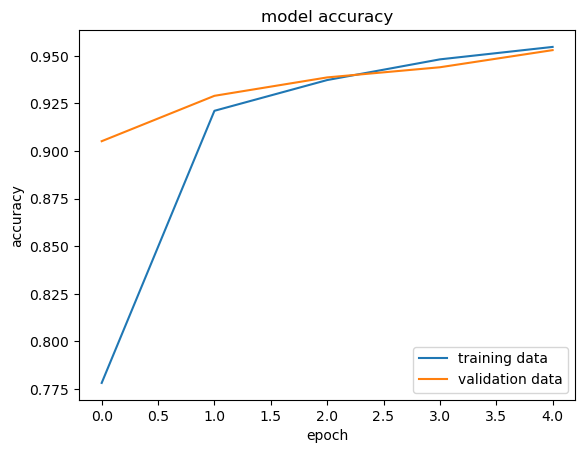

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

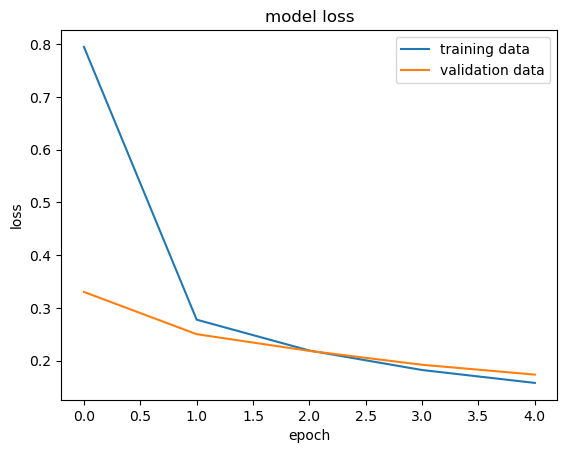

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [13]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1585 - accuracy: 0.9534


In [14]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.16. Test accuracy: 95.34%
